In [91]:
import pandas as pd
import csv
import numpy as np
import math
import matplotlib.pyplot as plt

In [92]:
# read file
expenses = pd.read_csv('Kosten_Silvester24_25.csv', sep=';', decimal=",") 
expenses['Price'] = expenses['Price'].astype(float)
drinks = pd.read_csv('trinkt_alk_24_25.csv', sep=';')
eating_habits = pd.read_csv('vegetarian_24_25.csv', sep=';')
display(expenses)
display(drinks)
display(eating_habits)

,Item,Price,Category,Name,Note
0,Cola,1.89,Drink,Adrian,NaN
1,Fanta,1.89,Drink,Adrian,NaN
2,Zwiebeln,2.49,Food,Adrian,NaN
3,Butter,2.99,Food,Adrian,NaN
4,Haferdrink,1.90,Food,Adrian,NaN
5,Pudding,1.98,Food,Adrian,NaN
6,Schokolade,1.99,Food,Adrian,NaN
7,Reis,5.00,Food,Adrian,NaN
8,Chips,1.09,Food,Adrian,NaN
9,Knaberbox,3.38,Food,Adrian,NaN


,Name,Alcohol
0,Natascha,0
1,Adrian,1
2,Ben,1
3,Moritz,0
4,Klara,1
5,Simon,1
6,Philip,0
7,Lena,0
8,Tom,0
9,Paul,1


,Name,Vegetarian
0,Natascha,1
1,Adrian,0
2,Ben,0
3,Moritz,0
4,Klara,0
5,Simon,1
6,Philip,0
7,Lena,1
8,Tom,0
9,Paul,0


In [93]:
sum_expenses = np.sum(expenses['Price'])
print('Total expenses: ', sum_expenses)

# food & non-alcoholic expenses
sum_non_alcoholic_drinks = np.sum(expenses[expenses['Category'] == 'Drink']['Price'])
print('Non-alcoholic expenses: ', sum_non_alcoholic_drinks)

# food expenses
sum_food_vegetarian = np.sum(expenses[expenses['Category'] == 'Food-vegan']['Price'])
sum_food_meat = np.sum(expenses[expenses['Category'] == 'Food-meat']['Price'])
sum_food_wo_meat_or_vegetarian = np.sum(expenses[expenses['Category'] == 'Food']['Price'])
print('Food expenses vegetarian: ', sum_food_vegetarian)
print('Food expenses meat: ', sum_food_meat)
print('Food expenses without meat or tofu: ', sum_food_wo_meat_or_vegetarian)

# alcohol expenses
sum_alcohol = np.sum(expenses[expenses['Category'] == 'Alcohol']['Price'])
print('Alcohol expenses: ', sum_alcohol)

Total expenses:  84.03
Non-alcoholic expenses:  9.969999999999999
Food expenses vegetarian:  5.97
Food expenses meat:  25.96
Food expenses without meat or tofu:  26.25
Alcohol expenses:  15.879999999999999


In [94]:
# drinks alcohol
alkis = drinks[drinks['Alcohol'] == 1]
print('drinks alc:\n', alkis)
print('\ndrinks no alc:\n', drinks[drinks['Alcohol'] == 0])

drinks alc:
        Name  Alcohol
1    Adrian        1
2       Ben        1
4     Klara        1
5     Simon        1
9     Paul         1
10    Ramon        1
13  Johanna        1
14  Bastian        1
16    David        1

drinks no alc:
         Name  Alcohol
0   Natascha        0
3     Moritz        0
6     Philip        0
7       Lena        0
8        Tom        0
11   Daniel         0
12  Viktoria        0
15    Adarsh        0


In [95]:
# vegetarian
veggies = eating_habits[eating_habits['Vegetarian'] == 1]
print('veggies:\n', veggies)
print('\nmeat:\n', eating_habits[eating_habits['Vegetarian'] == 0])

veggies:
         Name  Vegetarian
0   Natascha           1
5      Simon           1
7       Lena           1
11    Daniel           1

meat:
         Name  Vegetarian
1     Adrian           0
2        Ben           0
3     Moritz           0
4      Klara           0
6     Philip           0
8        Tom           0
9       Paul           0
10     Ramon           0
12  Viktoria           0
13   Johanna           0
14   Bastian           0
15    Adarsh           0
16     David           0


In [96]:
# price per person
# alcohol
price_per_person_alcohol = round(sum_alcohol / len(alkis), 2)
print('price per person who drinks alcohol: ', price_per_person_alcohol)

# non-alcohol
price_per_person_non_alcohol = round(sum_non_alcoholic_drinks / len(drinks), 2)
print('price per person for non-alcoholic drinks: ', price_per_person_non_alcohol)

# food
base_price_food_per_person = round(sum_food_wo_meat_or_vegetarian / len(eating_habits), 2)
extra_price_per_person_vegetarian = round(sum_food_vegetarian / len(veggies), 2)
extra_price_per_person_meat = round(sum_food_meat / (len(eating_habits) - len(veggies)), 2)
print('price per person for vegetarian food: ', extra_price_per_person_vegetarian + base_price_food_per_person)
print('price per person for meat food: ', extra_price_per_person_meat + base_price_food_per_person)

# base price for food + non-alcoholic drinks
base_price_per_person = price_per_person_non_alcohol + base_price_food_per_person
print('base price (w/o meat or tofu & w/o alcohol) per person: ', base_price_per_person)

price per person who drinks alcohol:  1.76
price per person for non-alcoholic drinks:  0.59
price per person for vegetarian food:  3.0300000000000002
price per person for meat food:  3.54
base price (w/o meat or tofu & w/o alcohol) per person:  2.13


In [97]:
# paid
grouped_expenses = expenses.groupby('Name')['Price'].sum()
print('grouped expenses:\n', grouped_expenses)

grouped expenses:
 Name
Adrian    84.03
Name: Price, dtype: float64


In [98]:
# money due per person
# before subtracting the amount already paid
money_due = {p : base_price_per_person + 
                 price_per_person_alcohol * (p in alkis['Name'].values) + 
                 extra_price_per_person_meat * (1 - (p in veggies['Name'].values)) +
                 extra_price_per_person_vegetarian * (p in veggies['Name'].values) 
             for p in drinks['Name']}

# subtract the amount already paid
for p in grouped_expenses.index:
    if p in money_due.keys():
        money_due[p] = round(money_due[p] - grouped_expenses[p], 2)
        
print('money due:\n', money_due)

money due:
 {'Natascha': 3.62, 'Adrian': -78.14, 'Ben': 5.89, 'Moritz': 4.13, 'Klara': 5.89, 'Simon': 5.38, 'Philip': 4.13, 'Lena': 3.62, 'Tom': 4.13, 'Paul ': 5.89, 'Ramon': 5.89, 'Daniel ': 4.13, 'Viktoria': 4.13, 'Johanna': 5.89, 'Bastian': 5.89, 'Adarsh': 4.13, 'David': 5.89}


In [99]:
# cash flows
creditors = [p for p in money_due.keys() if money_due[p] < 0]
cash_flows = {}
#print('creditors:\n', creditors)
for c in creditors:
    while (money_due[c] < 0) and (len([p for p in money_due.keys() if money_due[p] > 0]) > 1):
        #print('money due:\n', money_due[c])
        debtors = [p for p in money_due.keys() if money_due[p] > 0]
        #print('debtors:\n', debtors)
        for d in debtors:
            if (money_due[d] > 0) and (money_due[c] < 0):   
                money_paid = round(min(abs(money_due[c]), money_due[d]), 2)        
                print(d, ' pays ', c, ' ', money_paid)
                cash_flows[(d, c)] = money_paid
                money_due[d] = round(money_due[d] - money_paid, 2)
                money_due[c] = round(money_paid + money_due[c], 2)

Natascha  pays  Adrian   3.62
Ben  pays  Adrian   5.89
Moritz  pays  Adrian   4.13
Klara  pays  Adrian   5.89
Simon  pays  Adrian   5.38
Philip  pays  Adrian   4.13
Lena  pays  Adrian   3.62
Tom  pays  Adrian   4.13
Paul   pays  Adrian   5.89
Ramon  pays  Adrian   5.89
Daniel   pays  Adrian   4.13
Viktoria  pays  Adrian   4.13
Johanna  pays  Adrian   5.89
Bastian  pays  Adrian   5.89
Adarsh  pays  Adrian   4.13
David  pays  Adrian   5.4


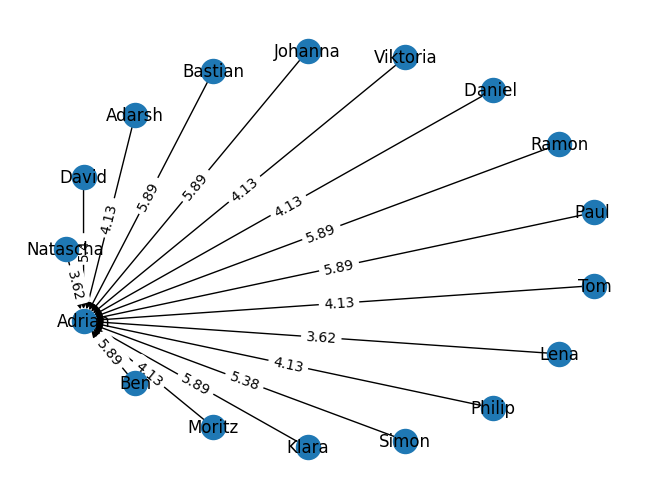

In [100]:
import networkx as nx
G = nx.DiGraph()
for f in cash_flows.keys():
    G.add_edge(f[0], f[1], weight=cash_flows[f])

pos = nx.shell_layout(G)
nx.draw(G,pos,with_labels=True)

# specifiy edge labels explicitly
edge_labels = dict([((u,v,),d['weight'])
for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

# show graphs
plt.savefig("plots/weighted_graph_24_25.png", format="png", dpi=300)
plt.show()


In [101]:
# check if all debts are paid
adrian_should_pay = (base_price_per_person + 
                 price_per_person_alcohol * ('Adrian' in alkis['Name'].values) + 
                 extra_price_per_person_meat * (1 - ('Adrian' in veggies['Name'].values)) +
                 extra_price_per_person_vegetarian * ('Adrian' in veggies['Name'].values))

print(cash_flows)
print('Total amount paid:', sum(cash_flows.values()) + adrian_should_pay)
print('Total amount due:', sum_expenses)

{('Natascha', 'Adrian'): 3.62, ('Ben', 'Adrian'): 5.89, ('Moritz', 'Adrian'): 4.13, ('Klara', 'Adrian'): 5.89, ('Simon', 'Adrian'): 5.38, ('Philip', 'Adrian'): 4.13, ('Lena', 'Adrian'): 3.62, ('Tom', 'Adrian'): 4.13, ('Paul ', 'Adrian'): 5.89, ('Ramon', 'Adrian'): 5.89, ('Daniel ', 'Adrian'): 4.13, ('Viktoria', 'Adrian'): 4.13, ('Johanna', 'Adrian'): 5.89, ('Bastian', 'Adrian'): 5.89, ('Adarsh', 'Adrian'): 4.13, ('David', 'Adrian'): 5.4}
Total amount paid: 84.03
Total amount due: 84.03
